In [1]:
import pandas as pd
import scipy as sp
import numpy as np

filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


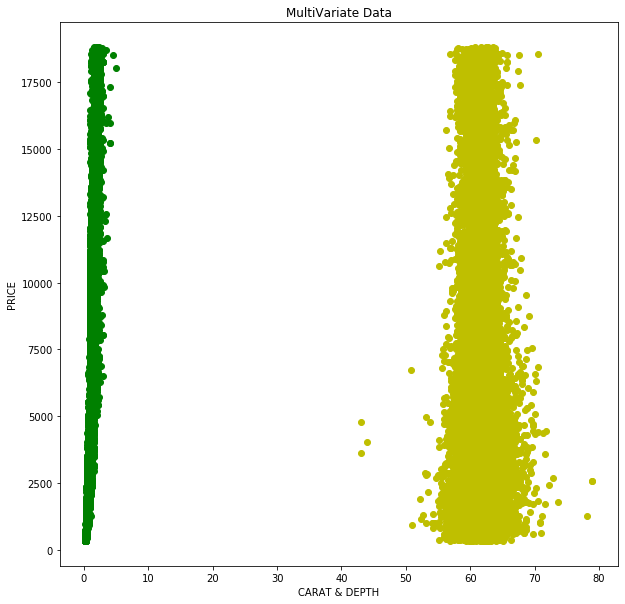

In [7]:
import matplotlib.pyplot as plt
plt.title("MultiVariate Data")
#for i in range(len(df)-1):
    #j=str(i)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df[:]['carat'],df[:]['price'],'go')
plt.plot(df[:]['depth'],df[:]['price'],'yo')
plt.xlabel("CARAT & DEPTH")
plt.ylabel("PRICE")
plt.show()

In [11]:
def mahalanobisDistance(x=None, data=None, cov=None):
    """
    Compute the Mahalanobis Distance between each row of x and the data  
    x    = vector or matrix of data with, say, p columns.
    data = ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  = covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(df.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

data_x = df[['carat', 'depth', 'price']].head(500) #store these 3 attributes of first 500 data set
data_x['mahala'] = mahalanobisDistance(x=data_x, data=df[['carat', 'depth', 'price']])
data_x.head()

,carat,depth,price,mahala
0,0.23,61.5,326,1.709860
1,0.21,59.8,326,3.540097
2,0.23,56.9,327,12.715021
3,0.29,62.4,334,1.454469
4,0.31,63.3,335,2.347239


In [17]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.01),2)
#> 9.21

9.21034037197618

In [18]:
# Compute the P-Values
data_x['p_value'] = 1 - chi2.cdf(data_x['mahala'], 2)

# Extreme values with a significance level of 0.01
print("Outliars")
data_x.loc[data_x.p_value < 0.01].head(10)

Outliars


,carat,depth,price,mahala,p_value
2,0.23,56.9,327,12.715021,0.001734
91,0.86,55.1,2757,23.909643,0.000006
97,0.96,66.3,2759,11.781773,0.002765
172,1.17,60.2,2774,9.279459,0.009660
204,0.98,67.9,2777,20.086616,0.000043
221,0.70,57.2,2782,10.405659,0.005501
227,0.84,55.1,2782,23.548379,0.000008
255,1.05,65.8,2789,11.237146,0.003630
284,1.00,58.2,2795,10.349019,0.005659
298,1.01,67.4,2797,17.716144,0.000142


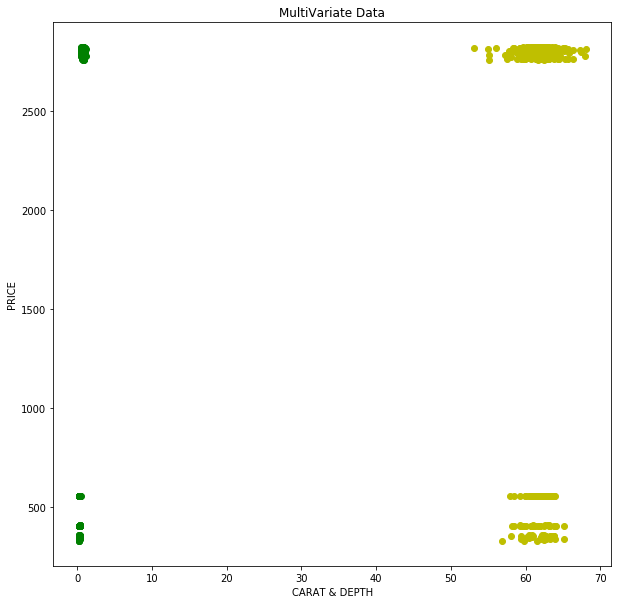

In [19]:
import matplotlib.pyplot as plt
plt.title("MultiVariate Data")
#for i in range(len(df)-1):
    #j=str(i)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.plot(data_x[:]['carat'],data_x[:]['price'],'go')
plt.plot(data_x[:]['depth'],data_x[:]['price'],'yo')
plt.xlabel("CARAT & DEPTH")
plt.ylabel("PRICE")
plt.show()